In [1]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image, ImageEnhance ,ImageFilter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_mini = pd.read_csv('../datos/grabacion/datos_bo3_minimapa.csv')

In [4]:
df_mini.dtypes

mini_01        object
mini_02        object
mini_03        object
mini_04        object
mini_05        object
mouse_final    object
dtype: object

In [5]:
df_mini.head(20)

,mini_01,mini_02,mini_03,mini_04,mini_05,mouse_final
0,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[384, 29]"
1,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[384, 29]"
2,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[543, 20]"
3,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[384, 29]"
4,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[543, 20]"
5,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,"[0, 0]"
6,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[384, 29]"
7,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,"[543, 20]"
8,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-1...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,"[0, 0]"
9,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,datos/grabacion/mini_mapa/mini_mapa_27-14-18-2...,"[0, 0]"


In [6]:
print(df_mini.shape)

(722997, 6)


In [3]:
#Eliminamos duplicados
df_mini.drop_duplicates(inplace=True)

In [4]:
print(df_mini.shape)

(1201, 6)


In [4]:
import ast
# Convertir la columna de tipo object a listas de enteros
df_mini['mouse_final'] = df_mini['mouse_final'].apply(ast.literal_eval)

In [10]:
df_mini.dtypes

mini_01        object
mini_02        object
mini_03        object
mini_04        object
mini_05        object
mouse_final    object
dtype: object

In [10]:
print(type(df_mini['mouse_final'].iloc[0]))

<class 'list'>


In [11]:
print(type(df_mini['mouse_final'].iloc[0][0]))

<class 'int'>


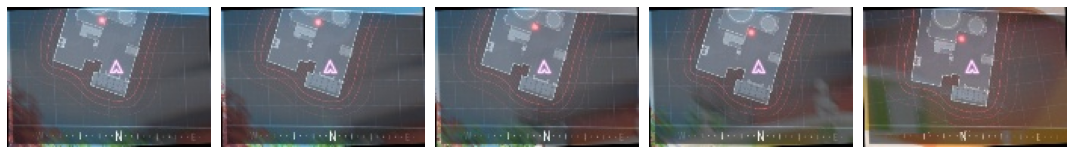

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(0,5):
    primera_fila = df_mini.iloc[0]
    imagen = Image.open("../" +str(primera_fila.iloc[i]))
    matriz_np = np.array(imagen)  

    axes[i].imshow(matriz_np)
    axes[i].axis('off')

plt.tight_layout()
plt.show()  

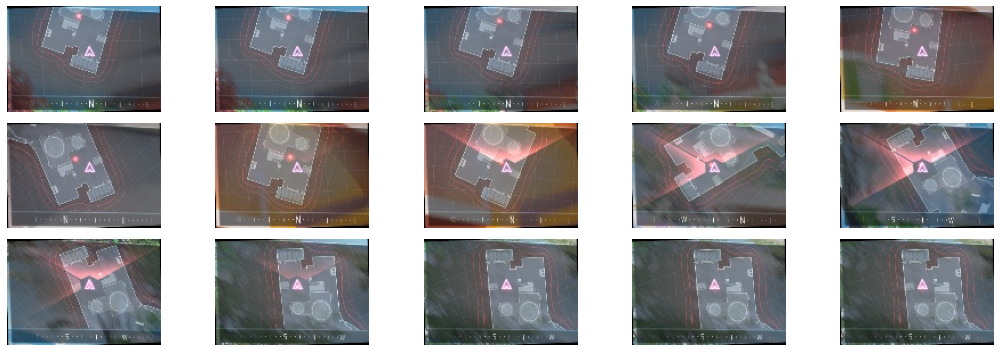

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for i in range(3): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = df_mini.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Tamaño imagen -> (135, 93)
Tamaño matriz -> (93, 135, 3)


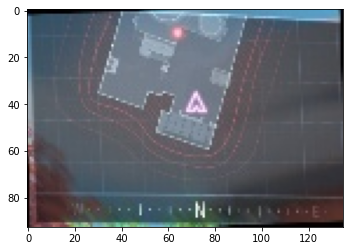

In [14]:
primera_fila = df_mini.iloc[0]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen)  
print("Tamaño imagen -> "+str(imagen.size))
print("Tamaño matriz -> "+ str(matriz_np.shape))
plt.imshow(matriz_np)
plt.axis('on')
plt.show()

# Prueba Filtros Imagenes Mapa

In [ ]:
num_image = 10

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aumentar el contraste
enhancer = ImageEnhance.Contrast(Image.fromarray(matriz_np))
factor = 2.5  # Puedes ajustar este valor según tus necesidades
image_contrast = enhancer.enhance(factor)


plt.imshow(image_contrast)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

In [ ]:
num_image = 10

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicamos Filtro
imagen_bordes = Image.fromarray(matriz_np).filter(ImageFilter.CONTOUR)

plt.imshow(imagen_bordes)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

In [ ]:
num_image = 10

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicamos Filtro
imagen_bordes = Image.fromarray(matriz_np).filter(ImageFilter.EMBOSS)

plt.imshow(imagen_bordes)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

In [ ]:
num_image = 10

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicamos Filtro
imagen_bordes = Image.fromarray(matriz_np).filter(ImageFilter.SHARPEN)

plt.imshow(imagen_bordes)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

In [ ]:
num_image = 10

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicar la equalización del histograma
imagen_gray = cv2.cvtColor(matriz_np, cv2.COLOR_RGB2GRAY)
imagen_equalizada = cv2.equalizeHist(imagen_gray)

plt.imshow(imagen_equalizada)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

In [ ]:
num_image = 10

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicar filtro Canny
imagen_gray = cv2.cvtColor(matriz_np, cv2.COLOR_RGB2GRAY)
imagen_equalizada = cv2.Canny(imagen_gray, 100, 200)

plt.imshow(imagen_equalizada)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

In [ ]:
num_image = 10

primera_fila = df_mini.iloc[num_image]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen) 

# Aplicar filtro Canny
imagen_gray = cv2.cvtColor(matriz_np, cv2.COLOR_RGB2GRAY)
imagen_equalizada = cv2.Laplacian(imagen_gray, cv2.CV_64F)

plt.imshow(imagen_equalizada)
plt.axis('on')
plt.show()

plt.imshow(matriz_np)
plt.axis('on')
plt.show()

# CREACION BATCH_DISTRIBUTION

#### Dado que mi equipo no es lo suficientemente potente como para cargar todas las imgenes en la RAM
#### Procedo a crear una clase que distribuya mi Dataset en pequeños trozos conocidos como BATCHES

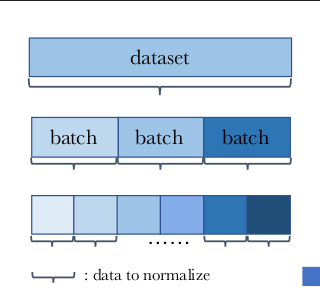

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.layers import Input, TimeDistributed, MaxPooling2D, Flatten, Dense ,ConvLSTM2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import Sequence

2024-06-28 09:17:42.397721: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 09:17:42.420760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI AVX512_BF16, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
class ImageDataGenerator(Sequence):
    def __init__(self, df , sequence_length ,image_height , image_width , batch_size=32, **kwargs):
        self.df = df
        self.image_sequence_length = sequence_length
        self.image_height = image_height
        self.image_width = image_width
        self.batch_size = batch_size
        super().__init__(**kwargs)  # Llamada al constructor de la clase base
        
    def __len__(self):
        return int(np.ceil(len(self.df) / float(self.batch_size)))
    
    def cargar_todo(self,fin_df):
        batch_df = self.df.iloc[0:fin_df]     #Obtenemos un lote del df
        
        X_batch = np.zeros((len(batch_df), self.image_sequence_length ,self.image_height, self.image_width, 3))  # Inicializar matriz para las imágenes
        y_batch = np.array(batch_df['mouse_final'].tolist())
        
        for i, (_, row) in enumerate(batch_df.iterrows()):
            frames = []
            for j in range(self.image_sequence_length):
                imagen = Image.open("../" + row.iloc[j])    # Obtener la ruta de la imagen
                imagen = Image.fromarray(np.array(imagen)).filter(ImageFilter.SHARPEN)  #Aplicamos Filtro SHARPEN
                imagen = np.array(imagen) / 255.0           # Normalizar la imagen

                frames.append(imagen)                  #Juntamos frames en lista
            video = np.stack(frames, axis=0)           # Convertir lista de frames en un video np
            X_batch[i] = video
        
        return X_batch, y_batch
    
    def __getitem__(self, index):
        inicio_lote = index * self.batch_size
        final_lote = (index + 1) * self.batch_size
        
        batch_df = self.df.iloc[inicio_lote:final_lote]     #Obtenemos un lote del df
        
        X_batch = np.zeros((len(batch_df), self.image_sequence_length ,self.image_height, self.image_width, 3))  # Inicializar matriz para las imágenes
        y_batch = np.array(batch_df['mouse_final'].tolist())
        
        for i, (_, row) in enumerate(batch_df.iterrows()):
            frames = []
            for j in range(self.image_sequence_length):
                imagen = Image.open("../" + row.iloc[j])    # Obtener la ruta de la imagen
                imagen = Image.fromarray(np.array(imagen)).filter(ImageFilter.SHARPEN)  #Aplicamos Filtro SHARPEN
                imagen = np.array(imagen) / 255.0           # Normalizar la imagen

                frames.append(imagen)                  #Juntamos frames en lista
            video = np.stack(frames, axis=0)           # Convertir lista de frames en un video np
            X_batch[i] = video
        
        return X_batch, y_batch

def comprobar_contenido(X_train , Y_train , num_video):

    fig, axs = plt.subplots(1, 5, figsize=(5 * 2, 1 * 2))

    for i in range(5):
        axs[i].imshow(X_train[num_video][i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
    print("Etiqueta -> "+ str(Y_train[num_video]))
    return Y_train[num_video]

In [14]:
df_mini.shape

(1201, 6)

# CREACION MODELO LSTM_CNN

<div style="text-align:center;">
    <iframe width="360" height="240" src="https://www.youtube.com/embed/deVW91RR_lQ" title="Deep Learning - 05 17 CNN LSTM" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</div>

https://www.kaggle.com/code/alextrinity/multi-head-cnn-bigru-cross-attention

In [14]:
def creacion_modelo_convLSTM(input_shape):
    
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    # Capa ConvLSTM_0
    model.add(ConvLSTM2D(filters= 248, kernel_size=(3, 3), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))
    
    # Capa ConvLSTM_01

    model.add(ConvLSTM2D(filters= 128, kernel_size=(3, 3), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))


    # Capa ConvLSTM_02
    '''
    model.add(ConvLSTM2D(filters= 64, kernel_size=(4, 4), 
                                    activation='relu', 
                                    padding='same', 
                                    return_sequences=True))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Dropout(0.2)))
    '''
    # Otra capa ConvLSTM_03 sin TimeDistribute
    '''
    model.add(ConvLSTM2D(filters=32, kernel_size=(8, 8), 
                         activation='relu', 
                         padding='same', 
                         return_sequences=False))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    '''
    
    
    # Capa densa adicional
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))  # Capa densa adicional
    model.add(Dense(16, activation='relu'))  # Capa densa adicional
    model.add(Dense(2))  # Salida para regresión con 2 unidades (ejemplo)

    return model

# PREPARACIÒN ENTRENAMIENTO

In [8]:
# Modelo Mini-Mapa
X_train, X_test = train_test_split(df_mini, test_size=0.2, random_state=42)
X_train, X_valid = train_test_split(X_train, test_size=0.25, random_state=42)

print("Tamaño total: ",len(df_mini))
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))
print("Tamaño del conjunto de validación:", len(X_valid))

Tamaño total:  1201
Tamaño del conjunto de entrenamiento: 720
Tamaño del conjunto de prueba: 241
Tamaño del conjunto de validación: 240


In [9]:
altura_img_mini = 93
anchura_img_mini = 135
batch_size = 4 #videos por batch

In [10]:
# Generadores de Batches Mini-Mapa
train_generator = ImageDataGenerator(X_train, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size)
test_generator = ImageDataGenerator(X_test, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size)
valid_generator = ImageDataGenerator(X_valid, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size)

In [17]:
#Cantidad de batches en los que se divide el df
train_generator.__len__()

180

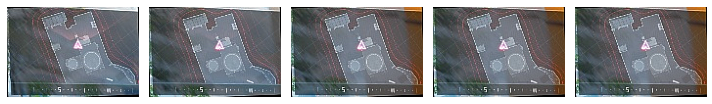

Etiqueta -> [0 0]


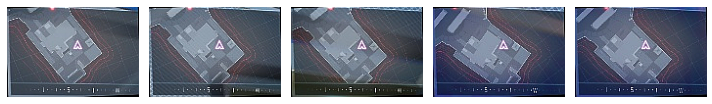

Etiqueta -> [-54  -2]


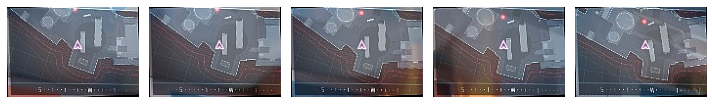

Etiqueta -> [2 0]


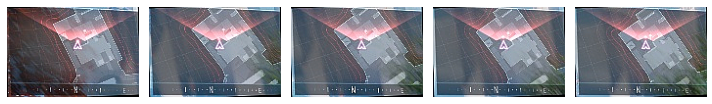

Etiqueta -> [-1  1]


In [11]:
#Comprobamos funcionamiento bach
# Obtenemos el batch numero (2)
X_batch, y_batch = train_generator.__getitem__(2)

for i in range(0,4):  # 4 es el maximo de conjunto de imagenes del batch creado
    # Seleccionamos ver la posicion numero 0 del batch creado
    comprobar_contenido(X_batch , y_batch,i)

In [22]:
# Verificar dispositivos disponibles
if tf.test.gpu_device_name():
    print('GPU encontrada:', tf.test.gpu_device_name())
else:
    print("No se encontró GPU. Se utilizará la CPU.")

GPU encontrada: /device:GPU:0


2024-06-27 18:01:21.589715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 18:01:21.589924: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 18:01:21.590063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

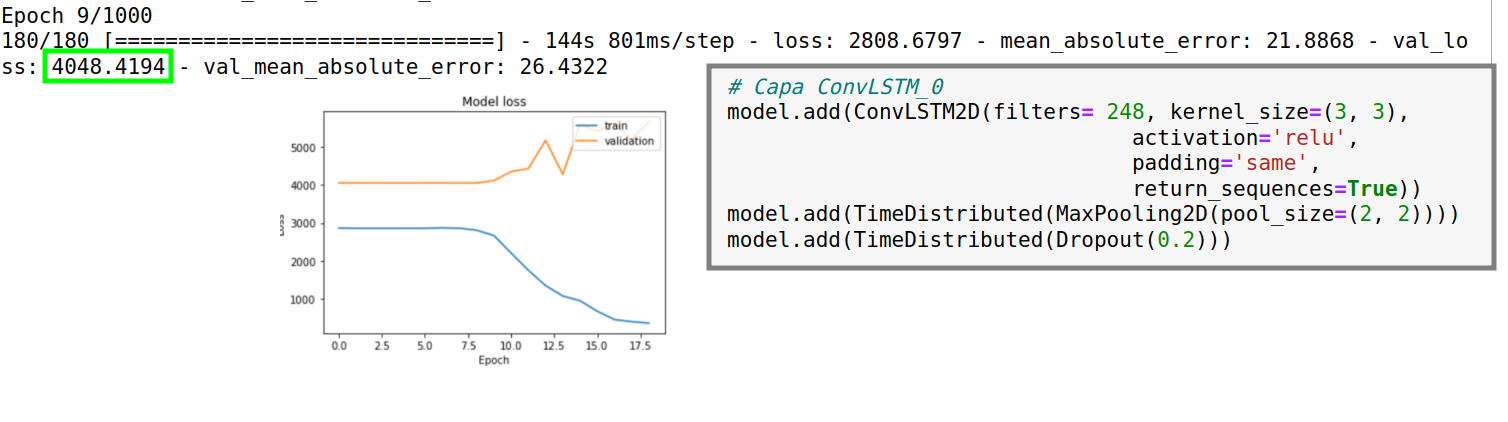

# Entrenamiento Normal

In [15]:
# Modelo Mini-Mapa
timesteps = 5
height = 93
width = 135
channels = 3
input_shape = (timesteps, height, width, channels)

model_mini_mapa = creacion_modelo_convLSTM(input_shape)
model_mini_mapa.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [16]:
model_mini_mapa.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_2 (ConvLSTM2D)  (None, 5, 93, 135, 248)   2241920   
                                                                 
 time_distributed_4 (TimeDi  (None, 5, 46, 67, 248)    0         
 stributed)                                                      
                                                                 
 time_distributed_5 (TimeDi  (None, 5, 46, 67, 248)    0         
 stributed)                                                      
                                                                 
 conv_lstm2d_3 (ConvLSTM2D)  (None, 5, 46, 67, 128)    1733120   
                                                                 
 time_distributed_6 (TimeDi  (None, 5, 23, 33, 128)    0         
 stributed)                                                      
                                                      

In [17]:
import time

# Registro del tiempo de inicio
start_time = time.time()

# Entrenamiento Mini-Mapa
history = model_mini_mapa.fit(train_generator, epochs=1000, validation_data=valid_generator, callbacks=[early_stopping])

# Registro del tiempo de finalización
end_time = time.time()

Epoch 1/1000


2024-06-28 09:22:54.098490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-06-28 09:22:54.969436: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-06-28 09:22:55.063190: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x62cd6e666d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-28 09:22:55.063204: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-06-28 09:22:55.065360: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-28 09:22:55.124884: I ./tensorflow/com

180/180 [==============================] - 167s 906ms/step - loss: 2860.4285 - mean_absolute_error: 21.0159 - val_loss: 4050.5283 - val_mean_absolute_error: 24.4960
Epoch 2/1000
180/180 [==============================] - 163s 905ms/step - loss: 2860.0283 - mean_absolute_error: 20.7463 - val_loss: 4050.5259 - val_mean_absolute_error: 24.4969
Epoch 3/1000
180/180 [==============================] - 164s 910ms/step - loss: 2860.0173 - mean_absolute_error: 20.7481 - val_loss: 4050.4756 - val_mean_absolute_error: 24.5010
Epoch 4/1000
180/180 [==============================] - 163s 907ms/step - loss: 2860.0220 - mean_absolute_error: 20.7525 - val_loss: 4050.4431 - val_mean_absolute_error: 24.5044
Epoch 5/1000
180/180 [==============================] - 162s 901ms/step - loss: 2860.0525 - mean_absolute_error: 20.7556 - val_loss: 4050.4143 - val_mean_absolute_error: 24.5075
Epoch 6/1000
180/180 [==============================] - 162s 899ms/step - loss: 2860.0073 - mean_absolute_error: 20.7584 - 

Epoch 47/1000
180/180 [==============================] - 162s 900ms/step - loss: 2859.9246 - mean_absolute_error: 20.8279 - val_loss: 4049.7332 - val_mean_absolute_error: 24.5622
Epoch 48/1000
180/180 [==============================] - 162s 899ms/step - loss: 2859.9102 - mean_absolute_error: 20.8285 - val_loss: 4049.7166 - val_mean_absolute_error: 24.5634
Epoch 49/1000
180/180 [==============================] - 162s 899ms/step - loss: 2859.9163 - mean_absolute_error: 20.8282 - val_loss: 4049.7180 - val_mean_absolute_error: 24.5627
Epoch 50/1000
180/180 [==============================] - 162s 899ms/step - loss: 2859.9131 - mean_absolute_error: 20.8278 - val_loss: 4049.7087 - val_mean_absolute_error: 24.5632
Epoch 51/1000
180/180 [==============================] - 162s 899ms/step - loss: 2859.9341 - mean_absolute_error: 20.8303 - val_loss: 4049.6943 - val_mean_absolute_error: 24.5634
Epoch 52/1000
180/180 [==============================] - 162s 900ms/step - loss: 2859.9287 - mean_absolut

Epoch 93/1000
180/180 [==============================] - 164s 912ms/step - loss: 2859.8645 - mean_absolute_error: 20.8511 - val_loss: 4049.3213 - val_mean_absolute_error: 24.5806
Epoch 94/1000
180/180 [==============================] - 164s 911ms/step - loss: 2859.8904 - mean_absolute_error: 20.8507 - val_loss: 4049.3193 - val_mean_absolute_error: 24.5807
Epoch 95/1000
180/180 [==============================] - 164s 911ms/step - loss: 2859.8909 - mean_absolute_error: 20.8472 - val_loss: 4049.3188 - val_mean_absolute_error: 24.5810
Epoch 96/1000
180/180 [==============================] - 165s 919ms/step - loss: 2859.8701 - mean_absolute_error: 20.8478 - val_loss: 4049.3215 - val_mean_absolute_error: 24.5803
Epoch 97/1000
180/180 [==============================] - 164s 911ms/step - loss: 2859.8813 - mean_absolute_error: 20.8508 - val_loss: 4049.2937 - val_mean_absolute_error: 24.5816
Epoch 98/1000
180/180 [==============================] - 164s 911ms/step - loss: 2859.8843 - mean_absolut

KeyboardInterrupt: 

In [ ]:
# Conversión de segundos a minutos
elapsed_minutes = end_time / 60

print(f"El proceso tardó aproximadamente {elapsed_minutes:.2f} minutos en ejecutarse.")

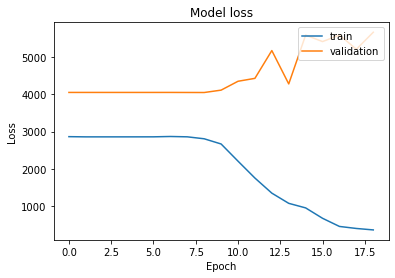

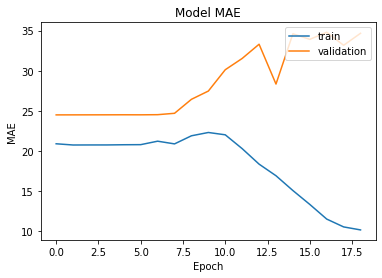

In [15]:
# Pérdida
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Métrica (MAE en este caso)
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [16]:
np_test,np_test_labels = test_generator.cargar_todo(X_test.shape[0])

In [72]:
np_test.shape

(241, 5, 93, 135, 3)

In [17]:
# Predicciones del modelo
y_pred = model_mini_mapa.predict(np_test)

2024-06-28 09:14:51.535093: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 403.02MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-06-28 09:14:52.693253: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.36GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-06-28 09:14:52.693281: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.36GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-06-28 09:14:52.877260: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (G

2024-06-28 09:15:12.879088: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 380.08MiB (rounded to 398545920)requested by op sequential/conv_lstm2d/while/body/_1/sequential/conv_lstm2d/while/convolution_3
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-06-28 09:15:12.879111: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-06-28 09:15:12.879119: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 62, Chunks in use: 62. 15.5KiB allocated for chunks. 15.5KiB in use in bin. 1.2KiB client-requested in use in bin.
2024-06-28 09:15:12.879125: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin

2024-06-28 09:15:22.880641: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 380.08MiB (rounded to 398545920)requested by op sequential/conv_lstm2d/while/body/_1/sequential/conv_lstm2d/while/convolution_7
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-06-28 09:15:22.880666: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-06-28 09:15:22.880673: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 62, Chunks in use: 62. 15.5KiB allocated for chunks. 15.5KiB in use in bin. 1.2KiB client-requested in use in bin.
2024-06-28 09:15:22.880678: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/conv_lstm2d/while/convolution_5' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 357, in dispatch_shell
      await result
    File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/usr/lib/python3/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_178730/522113407.py", line 2, in <module>
      y_pred = model_mini_mapa.predict(np_test)
    File "/usr/lib/python3/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/lib/python3/dist-packages/keras/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/usr/lib/python3/dist-packages/keras/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/lib/python3/dist-packages/keras/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/usr/lib/python3/dist-packages/keras/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/usr/lib/python3/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/usr/lib/python3/dist-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/lib/python3/dist-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/layers/rnn/base_rnn.py", line 556, in __call__
      return super().__call__(inputs, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/layers/rnn/base_conv_lstm.py", line 509, in call
      return super().call(
    File "/usr/lib/python3/dist-packages/keras/layers/rnn/base_conv_rnn.py", line 327, in call
      last_output, outputs, states = backend.rnn(
    File "/usr/lib/python3/dist-packages/keras/backend.py", line 5170, in rnn
      final_outputs = tf.compat.v1.while_loop(
    File "/usr/lib/python3/dist-packages/keras/backend.py", line 5149, in _step
      output, new_states = step_function(
    File "/usr/lib/python3/dist-packages/keras/layers/rnn/base_conv_rnn.py", line 325, in step
      return self.cell.call(inputs, states, **kwargs)
    File "/usr/lib/python3/dist-packages/keras/layers/rnn/base_conv_lstm.py", line 276, in call
      h_f = self.recurrent_conv(h_tm1_f, recurrent_kernel_f)
    File "/usr/lib/python3/dist-packages/keras/layers/rnn/base_conv_lstm.py", line 315, in recurrent_conv
      conv_out = self._conv_func(
    File "/usr/lib/python3/dist-packages/keras/backend.py", line 6172, in conv2d
      x = tf.compat.v1.nn.convolution(
Node: 'sequential/conv_lstm2d/while/convolution_5'
OOM when allocating tensor with shape[32,248,93,135] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv_lstm2d/while/convolution_5}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_24107]

In [81]:
#Convertimos las predicciones a int64
y_pred = y_pred.astype(np.int64)

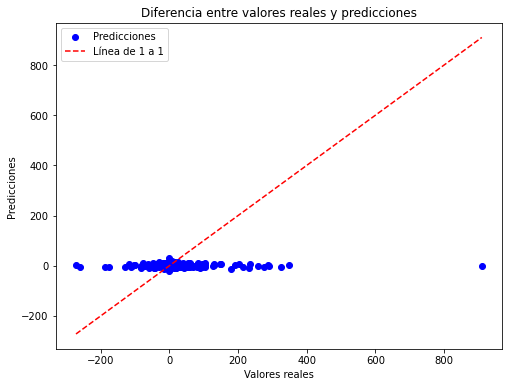

In [87]:
# Calcular los valores mínimos y máximos
min_val = np.min([np.min(np_test_labels), np.min(y_pred)])
max_val = np.max([np.max(np_test_labels), np.max(y_pred)])

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np_test_labels, y_pred, color='blue', label='Predicciones')
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Línea de 1 a 1')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Diferencia entre valores reales y predicciones')
plt.legend()
plt.show()

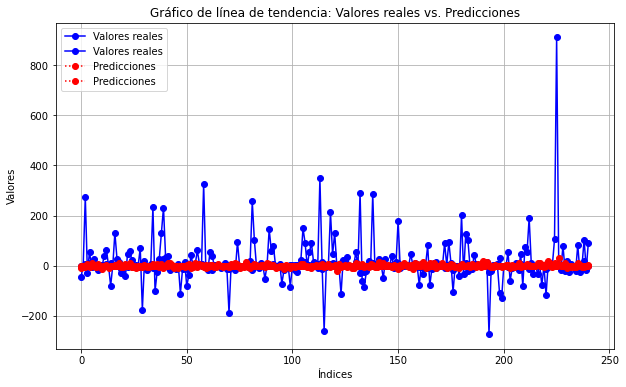

In [88]:
# Crear un rango de índices para el gráfico
indices = range(len(np_test_labels))

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(indices, np_test_labels, marker='o', linestyle='-', color='blue', label='Valores reales')
plt.plot(indices, y_pred, marker='o', linestyle=':', color='red', label='Predicciones')
plt.xlabel('Índices')
plt.ylabel('Valores')
plt.title('Gráfico de línea de tendencia: Valores reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_np,y_train = train_generator.cargar_todo(X_train.shape[0])
X_val_np,y_val = valid_generator.cargar_todo(X_valid.shape[0])

# Predecir las etiquetas para los conjuntos de entrenamiento y validación
y_train_pred = model_mini_mapa.predict(X_train_np)
y_val_pred = model_mini_mapa.predict(X_val_np)

# Calcular las métricas para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcular las métricas para el conjunto de validación
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Imprimir las métricas
print("Conjunto de entrenamiento:")
print("MSE:", mse_train)
print("MAE:", mae_train)
print("R^2:", r2_train)
print()
print("Conjunto de validación:")
print("MSE:", mse_val)
print("MAE:", mae_val)
print("R^2:", r2_val)

8/8 [==============================] - 1s 137ms/step
Conjunto de entrenamiento:
MSE: 2521.714388581514
MAE: 20.59032223315573
R^2: 0.029819114873111396

Conjunto de validación:
MSE: 4039.5503842596354
MAE: 26.28479856791285
R^2: -0.11398808914648623


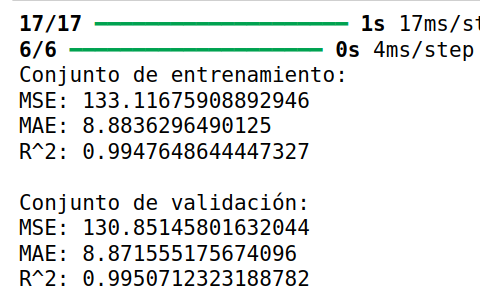

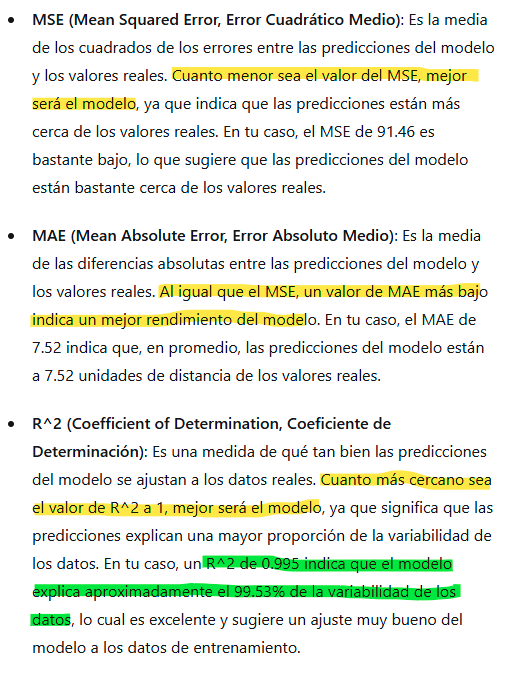

In [18]:
model_mini_mapa.save('../modelos/modelo_mapa_1.1_.h5')

/usr/lib/python3/dist-packages/keras/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
